Dataset Preview:
           Job Title  Country  Entry-Level Salary (USD)  Junior Salary (USD)  \
0  Software Engineer      USA                   70000.0                90000   
1  Software Engineer  Germany                   55000.0                75000   
2  Software Engineer    India                   20000.0                30000   
3    Senior Engineer      USA                       NaN               110000   
4    Senior Engineer  Germany                       NaN                95000   

   Senior Salary (USD)  
0               120000  
1               100000  
2                50000  
3               150000  
4               130000  


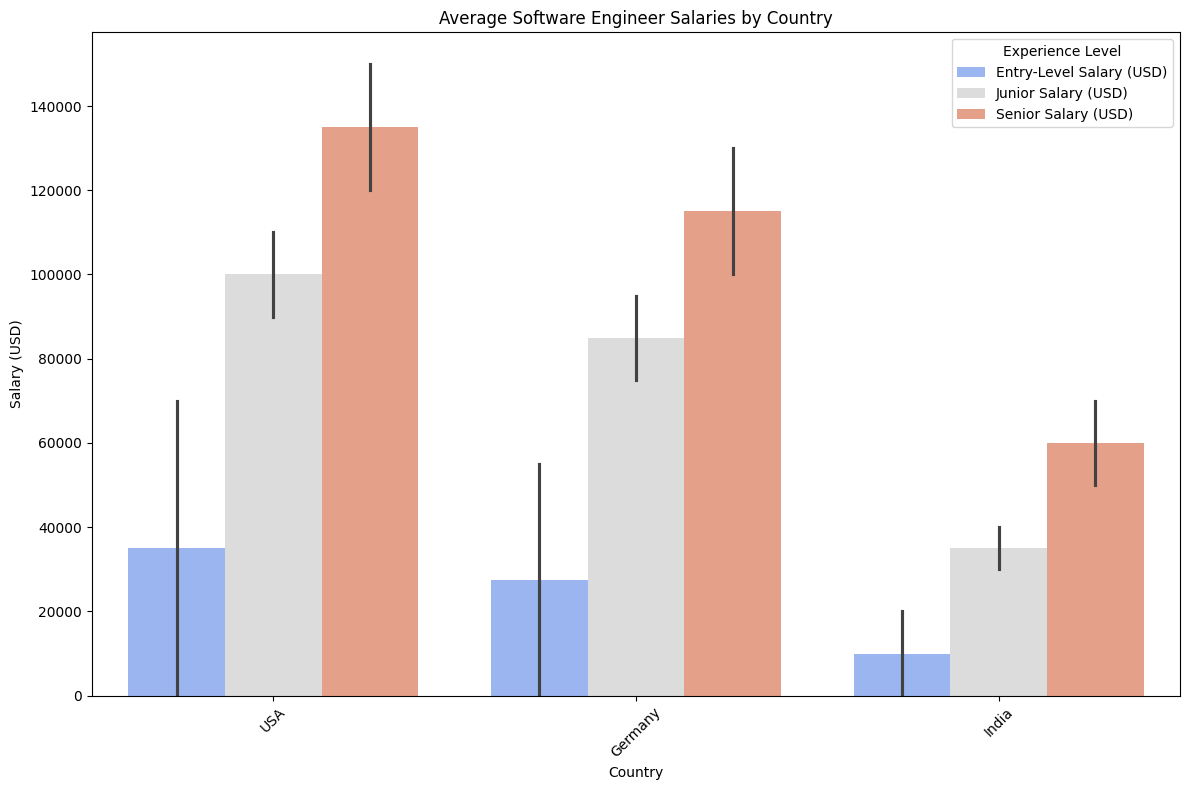

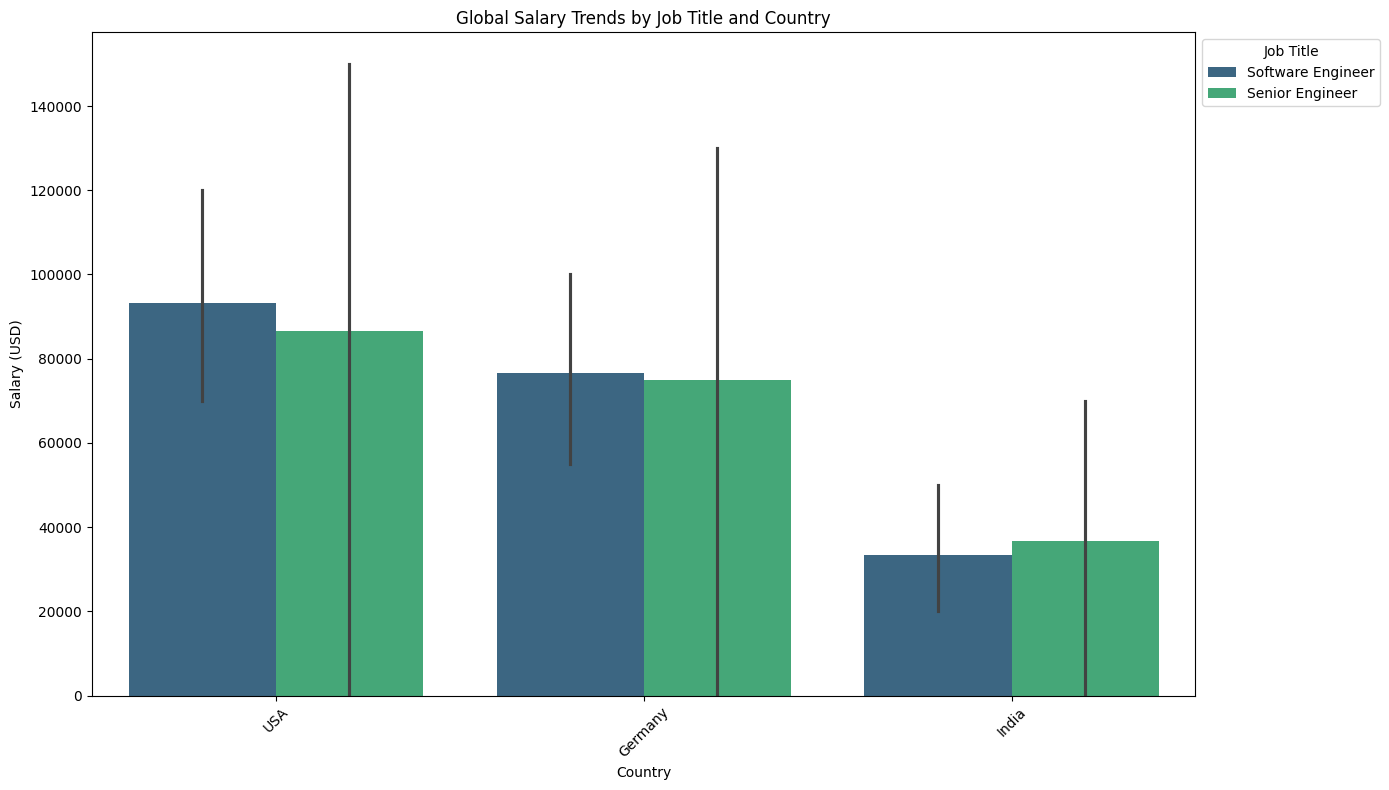

<ipython-input-31-7c5e3e9556ce>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x="Experience Level", y="Salary", palette="muted")


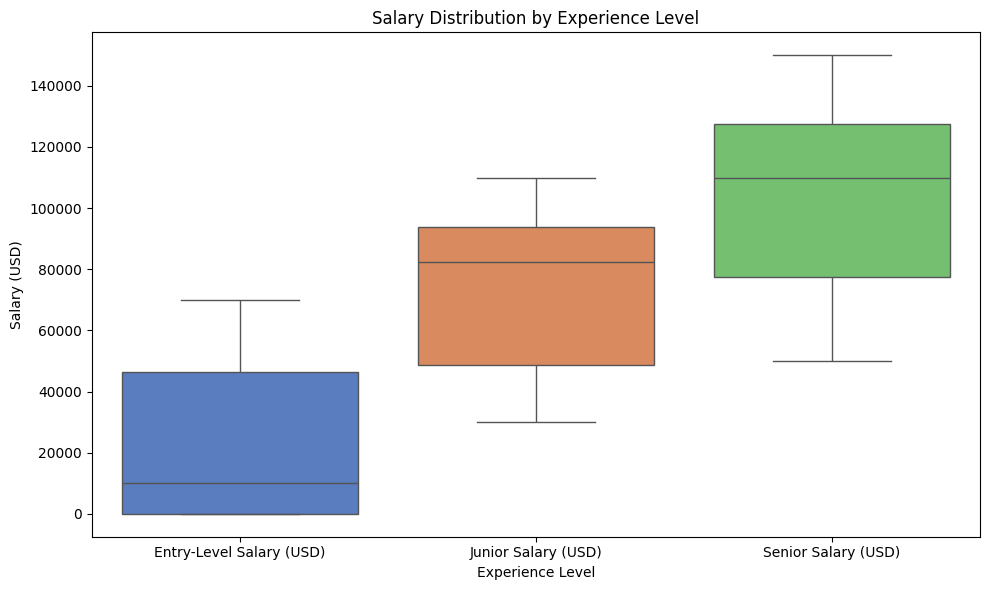

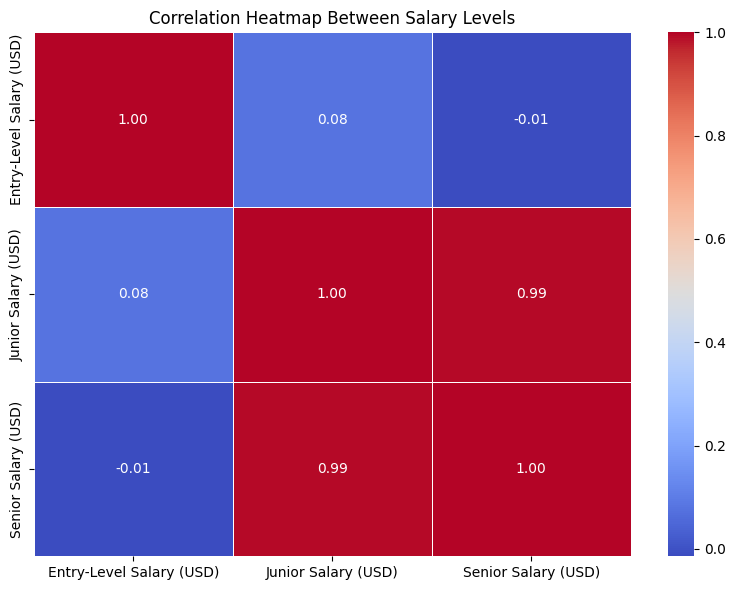


Top Paying Countries (Average Salary):
Country
USA        90000.000000
Germany    75833.333333
India      35000.000000
Name: Salary, dtype: float64


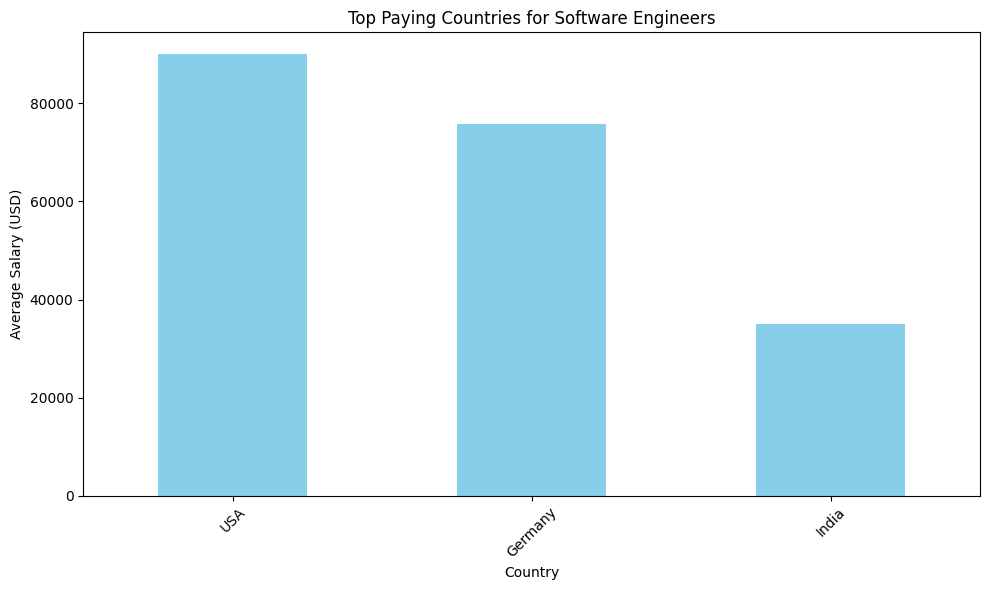

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data: Global Software Engineer Salaries
data = {
    "Job Title": ["Software Engineer", "Software Engineer", "Software Engineer", "Senior Engineer", "Senior Engineer", "Senior Engineer"],
    "Country": ["USA", "Germany", "India", "USA", "Germany", "India"],
    "Entry-Level Salary (USD)": [70000, 55000, 20000, None, None, None],
    "Junior Salary (USD)": [90000, 75000, 30000, 110000, 95000, 40000],
    "Senior Salary (USD)": [120000, 100000, 50000, 150000, 130000, 70000],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Inspect the dataset
print("Dataset Preview:")
print(df.head())

# Handle missing values
df.fillna(0, inplace=True)

# Melt the data for better analysis
df_melted = pd.melt(
    df,
    id_vars=["Job Title", "Country"],
    value_vars=["Entry-Level Salary (USD)", "Junior Salary (USD)", "Senior Salary (USD)"],
    var_name="Experience Level",
    value_name="Salary",
)

# Reorder 'Experience Level' for consistent plotting
df_melted["Experience Level"] = pd.Categorical(
    df_melted["Experience Level"],
    categories=["Entry-Level Salary (USD)", "Junior Salary (USD)", "Senior Salary (USD)"],
    ordered=True,
)

# Visualization 1: Average Salary by Country
plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted, x="Country", y="Salary", hue="Experience Level", palette="coolwarm")
plt.title("Average Software Engineer Salaries by Country")
plt.ylabel("Salary (USD)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.legend(title="Experience Level")
plt.tight_layout()
plt.show()

# Visualization 2: Salary Trends by Job Title and Country
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x="Country", y="Salary", hue="Job Title", palette="viridis")
plt.title("Global Salary Trends by Job Title and Country")
plt.ylabel("Salary (USD)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.legend(title="Job Title", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Visualization 3: Salary Distribution by Experience Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x="Experience Level", y="Salary", palette="muted")
plt.title("Salary Distribution by Experience Level")
plt.ylabel("Salary (USD)")
plt.xlabel("Experience Level")
plt.tight_layout()
plt.show()

# Additional Analysis: Correlation Between Salary Levels
salary_columns = ["Entry-Level Salary (USD)", "Junior Salary (USD)", "Senior Salary (USD)"]
correlation_matrix = df[salary_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap Between Salary Levels")
plt.tight_layout()
plt.show()

# Country-Specific Analysis: Top Paying Countries
avg_salary_by_country = df_melted.groupby("Country")["Salary"].mean().sort_values(ascending=False)
print("\nTop Paying Countries (Average Salary):")
print(avg_salary_by_country)

# Visualization 4: Top Paying Countries
plt.figure(figsize=(10, 6))
avg_salary_by_country.plot(kind="bar", color="skyblue")
plt.title("Top Paying Countries for Software Engineers")
plt.ylabel("Average Salary (USD)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
